# Monte Carlo Simulation for Stories/Features/Epics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Input your historic data
```completed``` is your historic data. Add the past 7-15 iterations (or days, sprints, etc) of data. Each item in the list should represent the number of completed stories/features/epics in that time period.

```backlog_size``` is how many items remain in your backlog.

```num_simulations``` is how many simulations you want the model to run. Higher values will likely be more accurate, with diminishing returns. 1000 is usually pretty decent, but you may want to increase this if your backlog is Very Large.

```deadline``` is for our second model, where we are forecasting how many items will be completed in so many iterations. Input your target days/weeks/sprints here.

In [3]:
# Past Data. Each element of this list represents how many "items" were completed in each given day/sprint/timebox.
completed = [1,2,1,4,0,0,2,2,2,1]

## Start to set up our Monte Carlo Simulation
backlog_size = 105       # Items left in backlog. Used for the M.C. "When" simulation
deadline = 26            # How many iterations (days, sprints, timeboxes) until our deadline. Used for the M.C. "How Many" simulation
num_simulations = 10000  # Number of simulation runs


## Run the simulations

In [11]:
# Zero out an array with a row for each iteration of the simulation.
iterations_to_completion = np.zeros(num_simulations)

## Run our simulations
for i in range(num_simulations):
    # Initialize the backlog for this iteration
    remaining_backlog = backlog_size
    iteration_count = 0

    while remaining_backlog > 0:
        # Randomly select the number of stories completed in a sprint
        stories_completed = np.random.choice(completed)
        
        # Remove those stories from the backlog.
        remaining_backlog -= stories_completed
        iteration_count += 1

    iterations_to_completion[i] = iteration_count
    
    if i % 100 == 0:
        print(f'\r{i} "when" simulations run.', end='')
        
iterations_to_completion = sorted(iterations_to_completion)
print(f'\r{num_simulations} "when" simulations run.')
# iterations_to_completion now contains the number of sprints needed for each simulation run

# Initialize an array to track the total work items completed by the final iteration in each simulation
total_completed_by_final = np.zeros(num_simulations)

## Run our simulations
for sim in range(num_simulations):
    cumulative_completed = 0

    for iteration in range(deadline):
        # Randomly select the number of stories completed in a sprint
        stories_completed = np.random.choice(completed)
        
        # Update the cumulative completed count
        cumulative_completed += stories_completed

    # Store the total completed by the final iteration for this simulation
    total_completed_by_final[sim] = cumulative_completed

    if sim % 100 == 0:
        print(f'\r{sim} "how many" simulations run.', end='')
# Now total_completed_by_final contains the total number of work items completed by the final iteration in each simulation

print(f'\r{num_simulations} "how many" simulations run.')

10000 "when" simulations run.
10000 "how many" simulations run.


## Display the Iterations to Completion Histogram and data table
After running you will see a histogram of the results, and a table of the granular results. The histogram shows how many iterations each run took, and therefore how likely your backlog is expected to be completed in so many runs.

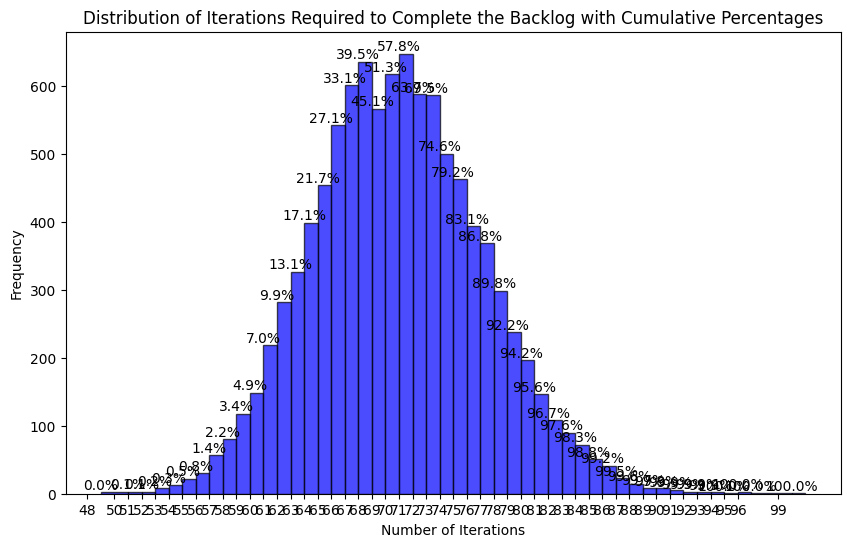

49: 0.02%
50: 0.02%
51: 0.05%
52: 0.08%
53: 0.16%
54: 0.29%
55: 0.51%
56: 0.81%
57: 1.38%
58: 2.18%
59: 3.36%
60: 4.85%
61: 7.04%
62: 9.86%
63: 13.13%
64: 17.12%
65: 21.66%
66: 27.09%
67: 33.11%
68: 39.47%
69: 45.14%
70: 51.32%
71: 57.80%
72: 63.68%
73: 69.55%
74: 74.56%
75: 79.19%
76: 83.13%
77: 86.82%
78: 89.81%
79: 92.19%
80: 94.16%
81: 95.63%
82: 96.71%
83: 97.61%
84: 98.33%
85: 98.84%
86: 99.25%
87: 99.48%
88: 99.63%
89: 99.72%
90: 99.80%
91: 99.86%
92: 99.89%
93: 99.92%
94: 99.94%
95: 99.95%
96: 99.98%
97: 99.99%
98: 99.99%
99: 99.99%
100: 100.00%


In [5]:
# Calculate histogram data
hist, bins = np.histogram(iterations_to_completion, bins=range(1, int(max(iterations_to_completion)) + 2))

# Calculate cumulative percentages
cumulative_counts = np.cumsum(hist)
total_counts = cumulative_counts[-1]
cumulative_percentages = cumulative_counts / total_counts * 100

# Displaying the cumulative distribution in a readable list format, only if the percentage is non-zero
cumulative_percentages_list = [f"{bins[i]}: {cumulative_percentages[i]:.2f}%" for i in range(len(cumulative_percentages)) if cumulative_percentages[i] > 0]

# Plotting the histogram
plt.figure(figsize=(10, 6))

# Adjusting the histogram to show only non-empty columns
non_empty_bins_indices = [i for i in range(len(hist)) if hist[i] > 0]
non_empty_bin_edges = [bins[i] for i in non_empty_bins_indices] + [bins[non_empty_bins_indices[-1] + 1]]

# Plotting the histogram with non-empty bins only
plt.hist(iterations_to_completion, bins=non_empty_bin_edges, alpha=0.7, color='blue', edgecolor='black', align='mid')

# Annotating with cumulative percentages
for i in non_empty_bins_indices:
    plt.text(bins[i], hist[i], f'{cumulative_percentages[i]:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Iterations Required to Complete the Backlog with Cumulative Percentages')
plt.xlabel('Number of Iterations')
plt.ylabel('Frequency')
plt.xticks(non_empty_bins_indices)  # Set x-axis ticks to show every sprint number
plt.show()

# Printing the list
for item in cumulative_percentages_list:
    print(item)


## Display the Work Items Complete by Iteration Histogram and data table
After running you will see a histogram of the results, and a table of the granular results. The histogram shows how many work items you can expect to complete in the number of iterations you specified above in ```deadline```.

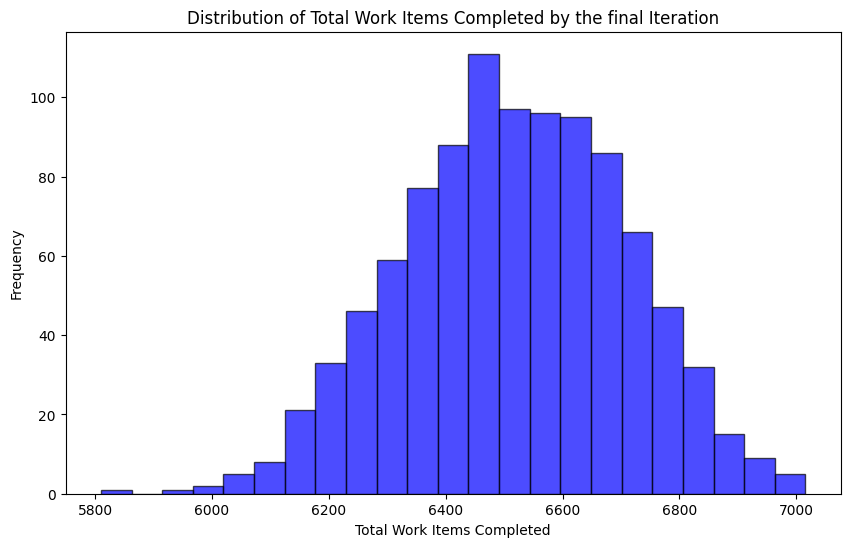

5836: 0.10%
5837: 0.10%
5838: 0.10%
5839: 0.10%
5840: 0.10%
5841: 0.10%
5842: 0.10%
5843: 0.10%
5844: 0.10%
5845: 0.10%
5846: 0.10%
5847: 0.10%
5848: 0.10%
5849: 0.10%
5850: 0.10%
5851: 0.10%
5852: 0.10%
5853: 0.10%
5854: 0.10%
5855: 0.10%
5856: 0.10%
5857: 0.10%
5858: 0.10%
5859: 0.10%
5860: 0.10%
5861: 0.10%
5862: 0.10%
5863: 0.10%
5864: 0.10%
5865: 0.10%
5866: 0.10%
5867: 0.10%
5868: 0.10%
5869: 0.10%
5870: 0.10%
5871: 0.10%
5872: 0.10%
5873: 0.10%
5874: 0.10%
5875: 0.10%
5876: 0.10%
5877: 0.10%
5878: 0.10%
5879: 0.10%
5880: 0.10%
5881: 0.10%
5882: 0.10%
5883: 0.10%
5884: 0.10%
5885: 0.10%
5886: 0.10%
5887: 0.10%
5888: 0.10%
5889: 0.10%
5890: 0.10%
5891: 0.10%
5892: 0.10%
5893: 0.10%
5894: 0.10%
5895: 0.10%
5896: 0.10%
5897: 0.10%
5898: 0.10%
5899: 0.10%
5900: 0.10%
5901: 0.10%
5902: 0.10%
5903: 0.10%
5904: 0.10%
5905: 0.10%
5906: 0.10%
5907: 0.10%
5908: 0.10%
5909: 0.10%
5910: 0.10%
5911: 0.10%
5912: 0.10%
5913: 0.10%
5914: 0.10%
5915: 0.10%
5916: 0.10%
5917: 0.10%
5918: 0.10%
5919

In [8]:
# Calculate histogram data with automatic binning for the histogram
hist_auto, bins_auto = np.histogram(total_completed_by_final, bins='auto')

# Calculate histogram data with integer-aligned bins for the data table
min_value = int(min(total_completed_by_final))
max_value = int(max(total_completed_by_final)) + 1  # +1 to include the upper edge
bins_integer = np.arange(min_value, max_value + 1)  # +1 to include the last value as a bin edge
hist_integer, _ = np.histogram(total_completed_by_final, bins=bins_integer)

# Calculate cumulative percentages using the integer-aligned histogram
cumulative_counts = np.cumsum(hist_integer)
total_counts = cumulative_counts[-1]
cumulative_percentages = cumulative_counts / total_counts * 100

# Displaying the cumulative distribution in a readable list format, only if the percentage is non-zero
cumulative_percentages_list = [f"{bins_integer[i]}: {cumulative_percentages[i]:.2f}%" for i in range(len(cumulative_percentages)) if cumulative_percentages[i] > 0]

# Plotting the histogram using automatic bins
plt.figure(figsize=(10, 6))
plt.hist(total_completed_by_final, bins=bins_auto, alpha=0.7, color='blue', edgecolor='black', align='left')

plt.title('Distribution of Total Work Items Completed by the final Iteration')
plt.xlabel('Total Work Items Completed')
plt.ylabel('Frequency')
plt.show()

# Printing the list
for item in cumulative_percentages_list:
    print(item)